<div align="center"> 
    <br>
    <br>
    <img src="https://raw.githubusercontent.com/AI-team-UoA/pyJedAI/main/documentation/pyjedai.logo.drawio.png?raw=true" alt="drawing" width="400"/>
    <br>
    <hr>
    <font size="3">User-Friendly Workflow Tutorial</font>
    <br>
</div>
<hr>

In this notebook we present the a __user-friendly approach__ in the well-known ABT-BUY dataset. This is a simple approach, specially developed for novice users in ER.

# Instalation

pyJedAI is an open-source library that can be installed from PyPI.

For more: [pypi.org/project/pyjedai/](https://pypi.org/project/pyjedai/)

In [1]:
!pip install pyjedai -U

In [2]:
!pip show pyjedai

Name: pyjedai
Version: 0.0.4
Summary: An open-source library that builds powerful end-to-end Entity Resolution workflows.
Home-page: 
Author: 
Author-email: Konstantinos Nikoletos <nikoletos.kon@gmail.com>, George Papadakis <gpapadis84@gmail.com>
License: Apache Software License 2.0
Location: c:\users\nikol\anaconda3\envs\pyjedai391\lib\site-packages
Requires: faiss-cpu, gensim, matplotlib, matplotlib-inline, networkx, nltk, numpy, optuna, pandas, pandas-profiling, pandocfilters, PyYAML, rdflib, rdfpandas, regex, scipy, seaborn, sentence-transformers, strsim, strsimpy, tomli, tqdm, transformers
Required-by: 


Imports

In [3]:
import os
import sys
import pandas as pd

## Data Reading

In [4]:
from pyjedai.datamodel import Data

data = Data(
    dataset_1=pd.read_csv("./../data/D2/abt.csv", sep='|', engine='python', na_filter=False).astype(str),
    attributes_1=['id','name','description'],
    id_column_name_1='id',
    dataset_2=pd.read_csv("./../data/D2/buy.csv", sep='|', engine='python', na_filter=False).astype(str),
    attributes_2=['id','name','description'],
    id_column_name_2='id',
    ground_truth=pd.read_csv("./../data/D2/gt.csv", sep='|', engine='python'),
)

data.process()

## WorkFlow

In [5]:
from pyjedai.workflow import WorkFlow, compare_workflows
from pyjedai.block_building import StandardBlocking, QGramsBlocking, ExtendedQGramsBlocking, SuffixArraysBlocking, ExtendedSuffixArraysBlocking
from pyjedai.block_cleaning import BlockFiltering, BlockPurging
from pyjedai.comparison_cleaning import WeightedEdgePruning, WeightedNodePruning, CardinalityEdgePruning, CardinalityNodePruning, BLAST, ReciprocalCardinalityNodePruning, ReciprocalWeightedNodePruning, ComparisonPropagation
from pyjedai.matching import EntityMatching
from pyjedai.clustering import ConnectedComponentsClustering

In [6]:
w = WorkFlow(
    block_building = dict(
        method=QGramsBlocking,
        params=dict(qgrams=3),
        attributes_1=['name'],
        attributes_2=['name']
    ),
    block_cleaning = [
        dict(
            method=BlockFiltering,
            params=dict(ratio=0.8)
        ),
        dict(
            method=BlockPurging, 
            params=dict(smoothing_factor=1.025)
        )
    ],
    comparison_cleaning = dict(method=CardinalityEdgePruning),
        entity_matching = dict(
        method=EntityMatching,
        metric='sorensen_dice',
        similarity_threshold=0.5,
        attributes = ['description', 'name']
    ),
    clustering = dict(method=ConnectedComponentsClustering),
    name="Worflow-Test"
)

In [7]:
w.run(data, verbose=True)

# Q-Grams Blocking Evaluation 
---
Method name: Q-Grams Blocking
Parameters: 
	Q-Gramms: 3
Runtime: 0.3505 seconds
Scores:
	Precision:      0.08% 
	Recall:       100.00%
	F1-score:       0.17%
Classification report:
	True positives: 1076
	False positives: 1282428
	True negatives: -124652
	False negatives: 0
	Total comparisons: 1283504
---


# Block Filtering Evaluation 
---
Method name: Block Filtering
Parameters: 
	Ratio: 0.8
Runtime: 0.1026 seconds
Scores:
	Precision:      0.06% 
	Recall:        99.91%
	F1-score:       0.12%
Classification report:
	True positives: 1075
	False positives: 1757290
	True negatives: -599515
	False negatives: 1
	Total comparisons: 1758365
---
# Block Purging Evaluation 
---
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 9191.0
Runtime: 0.0284 seconds
Scores:
	Precision:      0.05% 
	Recall:        99.91%
	F1-score:       0.10%
Classification report:
	True positives: 1075
	False positives: 2232151
	True negatives: -1074376
	False negatives: 1
	Total comparisons: 2233226
---


# Cardinality Edge Pruning Evaluation 
---
Method name: Cardinality Edge Pruning
Parameters: 
	Node centric: False
	Weighting scheme: JS
Runtime: 2.5577 seconds
Scores:
	Precision:      4.58% 
	Recall:        98.61%
	F1-score:       8.75%
Classification report:
	True positives: 1061
	False positives: 22121
	True negatives: 1135640
	False negatives: 15
	Total comparisons: 23182
---


# Entity Matching Evaluation 
---
Method name: Entity Matching
Parameters: 
	Metric: sorensen_dice
	Embeddings: None
	Attributes: None
	Similarity threshold: None
Runtime: 26.0537 seconds
Scores:
	Precision:      4.58% 
	Recall:        98.61%
	F1-score:       8.75%
Classification report:
	True positives: 1061
	False positives: 22121
	True negatives: 1135640
	False negatives: 15
	Total comparisons: 23182
---
# Connected Components Clustering Evaluation 
---
Method name: Connected Components Clustering
Parameters: 
Runtime: 0.0040 seconds
Scores:
	Precision:      0.09% 
	Recall:        99.81%
	F1-score:       0.19%
Classification report:
	True positives: 1074
	False positives: 1152097
	True negatives: 5677
	False negatives: 2
	Total comparisons: 1153171
---


In [8]:
w.to_df()

,Algorithm,F1,Recall,Precision,Runtime (sec),Params
0,Q-Grams Blocking,0.167526,100.000000,0.083833,0.350458,{'Q-Gramms': 3}
1,Block Filtering,0.122198,99.907063,0.061136,0.102638,{'Ratio': 0.8}
2,Block Purging,0.096227,99.907063,0.048137,0.028423,"{'Smoothing factor': 1.025, 'Max Comparisons p..."
3,Cardinality Edge Pruning,8.747630,98.605948,4.576827,2.557692,"{'Node centric': False, 'Weighting scheme': 'JS'}"
4,Entity Matching,8.747630,98.605948,4.576827,26.053679,"{'Metric': 'sorensen_dice', 'Embeddings': None..."
5,Connected Components Clustering,0.186095,99.814126,0.093134,0.004000,{}


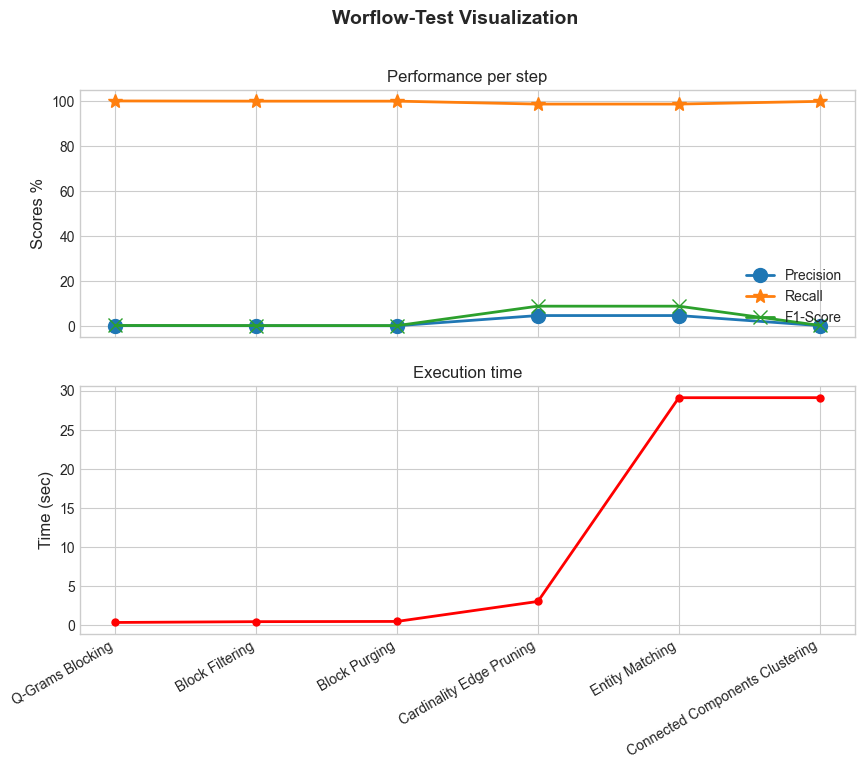

In [9]:
w.visualize()

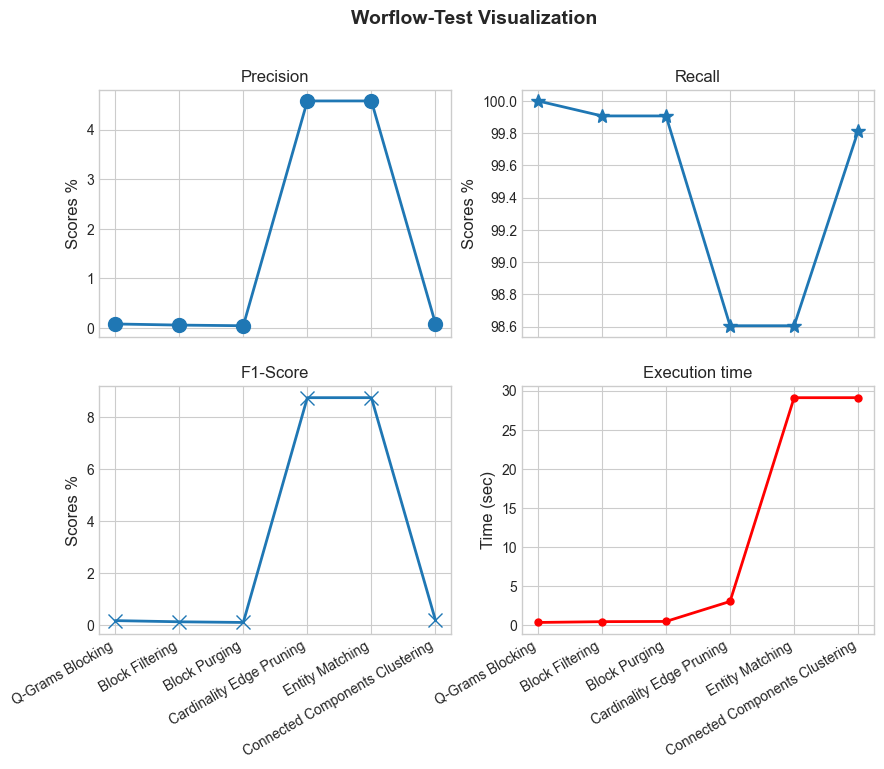

In [10]:
w.visualize(separate=True)

## Multiple workflows - Comparison

In [11]:
w1 = WorkFlow(
    block_building = dict(
        method=QGramsBlocking, 
        params=dict(qgrams=4),
        attributes_1=['name'],
        attributes_2=['name']
    ),
    block_cleaning = [
        dict(
            method=BlockFiltering, 
            params=dict(ratio=0.6)
        ),
        dict(
            method=BlockPurging, 
            params=dict(smoothing_factor=1.025)
        )
    ],
    comparison_cleaning = dict(method=CardinalityEdgePruning),
        entity_matching = dict(
        method=EntityMatching, 
        metric='sorensen_dice',
        similarity_threshold=0.5,
        attributes = ['description', 'name']
    ),
    clustering = dict(method=ConnectedComponentsClustering)
)
w1.run(data, verbose=False, workflow_tqdm_enable=True)
w2 = WorkFlow(
    block_building = dict(
        method=QGramsBlocking, 
        params=dict(qgrams=4),
        attributes_1=['name'],
        attributes_2=['name']
    ),
    block_cleaning = [
        dict(
            method=BlockFiltering, 
            params=dict(ratio=0.6)
        ),
        dict(
            method=BlockPurging, 
            params=dict(smoothing_factor=1.025)
        )
    ],
    comparison_cleaning = dict(method=CardinalityEdgePruning),
        entity_matching = dict(
        method=EntityMatching, 
        metric='sorensen_dice',
        similarity_threshold=0.6,
        attributes = ['description']
    ),
    clustering = dict(method=ConnectedComponentsClustering)
)
w2.run(data, verbose=False, workflow_tqdm_enable=True)

Workflow-1:   0%|          | 0/5 [00:00<?, ?it/s]

Workflow-2:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

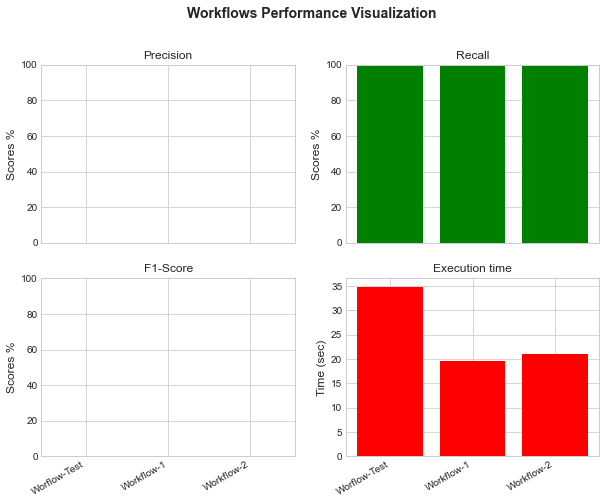

,Name,F1,Recall,Precision,Runtime (sec)
0,Worflow-Test,0.186095,99.814126,0.093134,34.825521
1,Workflow-1,0.193095,100.000000,0.096641,19.622044
2,Workflow-2,0.193095,100.000000,0.096641,21.104601


In [12]:
compare_workflows([w, w1, w2], with_visualization=True)